## Mounting disk

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


## Importing modules

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split

import nltk
import string
import warnings
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud

import tensorflow as tf
from tensorflow import keras
from keras import layers
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

nltk.download('stopwords')
nltk.download('omw-1.4')
nltk.download('wordnet')
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package wordnet to /root/nltk_data...


## Importing dataset and getting basic information about it

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/IPD/code/text/english/Dynamically Generated Hate Dataset v0.2.3.csv", on_bad_lines='skip')

In [ ]:
df.head()

,Unnamed: 0,acl.id,X1,text,label,type,target,level,split,round.base,annotator,round,acl.id.matched
0,1,acl1,1,dalits are lowlives,hate,notgiven,notgiven,original,train,1,GNZuCtwed3,1,NaN
1,2,acl10,2,gay people are a burden to our society,hate,notgiven,notgiven,original,train,1,GNZuCtwed3,1,NaN
2,3,acl100,3,Arabs are not welcome,hate,notgiven,notgiven,original,train,1,vDe7GN0NrL,1,NaN
3,4,acl1000,4,I'm not saying we should actually eliminate he...,hate,notgiven,notgiven,original,train,1,oemYWm1Tjg,1,NaN
4,5,acl10000,5,bananas are for black people,hate,notgiven,notgiven,original,test,1,QiOKkCi7F8,1,NaN


In [ ]:
df.drop(columns=['Unnamed: 0', 'acl.id', 'X1', 'type', 'target', 'level', 'split', 'round.base', 'annotator', 'round', 'acl.id.matched'], inplace=True)

In [ ]:
df['label'] = df['label'].apply(lambda x: 1 if x == 'hate' else 0)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41144 entries, 0 to 41143
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    41144 non-null  object
 1   label   41144 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 643.0+ KB


In [ ]:
df.describe()

,label
count,41144.000000
mean,0.538961
std,0.498486
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


In [ ]:
df.head()

,text,label
0,dalits are lowlives,1
1,gay people are a burden to our society,1
2,Arabs are not welcome,1
3,I'm not saying we should actually eliminate he...,1
4,bananas are for black people,1


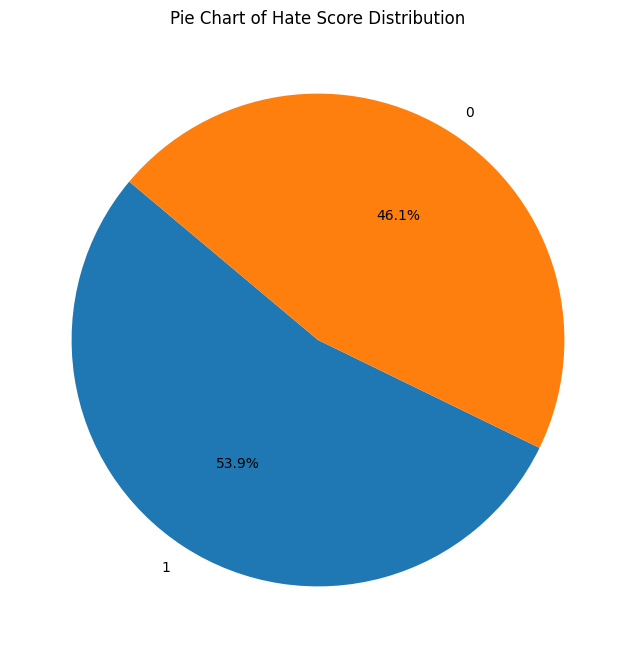

In [ ]:
value_counts = df['label'].value_counts(normalize=True) * 100

filtered_values = value_counts[value_counts > 5]

plt.figure(figsize=(8, 8))
plt.pie(filtered_values, labels=filtered_values.index, autopct='%1.1f%%', startangle=140)
plt.title('Pie Chart of Hate Score Distribution')
plt.show()

In [ ]:
df2 = pd.read_csv("/content/drive/MyDrive/IPD/code/text/english/reddit.csv")

In [ ]:
df2.head()

,id,text,hate_speech_idx,response
0,1. e8q18lf\n2. \te8q9w5s\n3. \t\te8qbobk\n4. \...,1. A subsection of retarded Hungarians? Ohh bo...,[1],"[""I don't see a reason why it's okay to insult..."
1,1. e9c6naz\n2. \te9d03a5\n3. \t\te9d8e4d\n,"1. > ""y'all hear sumn?"" by all means I live i...",[3],['Persons with disabilities is the accepted te...
2,1. e84rl2i\n2. \te84w60l\n3. \t\te8544rn\n4. \...,1. wouldn't the defenders or whatever they are...,NaN,NaN
3,1. e7kq72n\n2. \te7m24ar\n,1. Because the Japanese aren't retarded and kn...,[1],"[""It's not right for anyone of any gender to b..."
4,1. e7hdgoh\n2. \te7iyj6a\n3. \t\te7j6iho\n4. \...,1. That might be true if we didn't have an exa...,"[2, 3]","[""You shouldn't be bringing up sensitive topic..."


In [ ]:
df2.drop(columns=['id', 'response'], inplace=True)

In [ ]:
df2['text'][0]

"1. A subsection of retarded Hungarians? Ohh boy. brace for a livid Bulbasaur coming in here trying to hate a hole in some of her stupider countrymen.\n2. \tHiii. Just got off work. 444 is mainly the typa guys you imagine writing for US stupid sites, but basically they just try to fit in with the Western European and US big city hipsters.   Rich kids from Budapest who feel they are brave journalistic heroes.  \n3. \t\twow i guess soyboys are the same in every country\n4. \t\t\tOwen Benjamin's soyboy song goes for every country and that's why it's so amazing. \n"

In [ ]:
df2.columns

Index(['text', 'hate_speech_idx'], dtype='object')

In [ ]:
for i in range(4,5):
    l = df2['text'][i].split("\n")
    li = []
    print(type(l))
    if len(l) == 1:
        li.append(l[0])
        print(li)
    else:
        x = df2['hate_speech_idx'][i].split(',')
        print(x)

<class 'list'>
['[2', ' 3]']


In [ ]:
df2.hate_speech_idx.value_counts()

hate_speech_idx
[1]                      1740
[2]                       490
[3]                       265
[4]                       169
[1, 2]                    125
                         ... 
[1, 2, 4, 7, 9]             1
[1, 4, 5, 7, 9]             1
[12, 14]                    1
[2, 5, 6, 10, 11, 12]       1
[6, 10, 12, 16, 18]         1
Name: count, Length: 316, dtype: int64

## Text Preprocessing

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
from nltk.tokenize import word_tokenize

lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    tokens = word_tokenize(text)

    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word.lower() not in stop_words and word not in string.punctuation]

    tokens = [lemmatizer.lemmatize(word.lower()) for word in tokens]

    preprocessed_text = ' '.join(tokens)

    return preprocessed_text


In [ ]:
df['preprocessed_text'] = df['text'].apply(preprocess_text)

In [ ]:
tokenizer = Tokenizer()
max_len = 100

tokenizer.fit_on_texts(df['preprocessed_text'])
X = tokenizer.texts_to_sequences(df['preprocessed_text'])
X = pad_sequences(X, maxlen=max_len)

In [ ]:
sequence_lengths = [len(seq) for seq in X]
max_len = max(sequence_lengths)

In [ ]:
from keras.utils import to_categorical
y = to_categorical(df['label'])

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

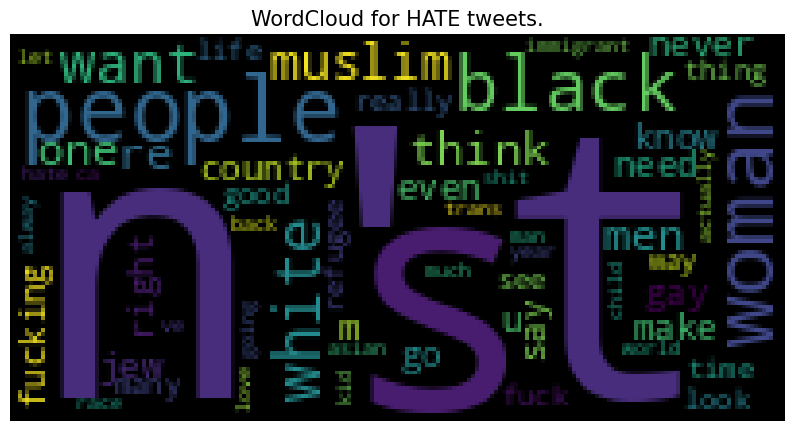

In [ ]:
def plot_word_cloud(data, typ):
  tweet_corpus = " ".join(data['preprocessed_text'])

  plt.figure(figsize = (10,10))

  wc = WordCloud(max_words = 100,
                width = 200,
                height = 100,
                collocations = False).generate(tweet_corpus)

  plt.title(f'WordCloud for {typ} tweets.', fontsize = 15)
  plt.axis('off')
  plt.imshow(wc)
  plt.show()
  print()

plot_word_cloud(df[df['label']>=0.75], typ='HATE')

In [ ]:
y_train

array([[1., 0.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [0., 1.],
       [1., 0.]], dtype=float32)

In [ ]:
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((32915, 100), (8229, 100), (32915, 2), (8229, 2))

In [ ]:
type(X_train)

numpy.ndarray

In [ ]:
y_train_binary = np.argmax(y_train, axis=1)
y_val_binary = np.argmax(y_val, axis=1)

In [ ]:
y_train_binary

array([0, 1, 1, ..., 0, 1, 0])

## Model Development

In [ ]:
words = []

for i in range(len(df)):
    temp = df['text'][i]
    for i in temp.split(" "):
        words.append(i)

In [ ]:
words = set(words)
print(words)
print(len(words))

{'', 'go', 'misandric', 'changas', '\r\r\r\na', 'gross...I', "'people',", 'unfortunate.', '#FTW.', '@ss°', 'am', 'slutting', 'same….we’re', 'bedbugs,', 'squalid', 'mouth?', 'samosas', '(wonder', 'financier', 'guide.', 'sh3b00n,', 'fraudulent?', 'generalize', 'twenty-nine', '"revelation"', 'orgasms.', 'identity.”', 'joining', 'Jo', 'non-binary.', 'russians......was', 'mission', 'bellends,', 'Jordanian,', 'Mumble', 'helps..', 'upstairs', 'So', 'white!', 'upvoting', 'Lauderdale’s', 'earnest', 'picture,', 'prat!', 'occurance.', 'thorough', 'handicap,', 'NORMAL', '(something', 'oblivious', 'health,', 'murdering', 'drink?', 'blower', 'support?', 'improve,', 'F***s', 'night?', 'her:', 'returns,', 'publicity).', 'belive', 'Ties', 'HAHAHAHHAA', 'brands,', 'Judeans)', 'successes', 'youg', 'wrong!', 'experiences.', 'readily', 'yours..', 'meat', 'park),', 'devious', 'sjw.', 'action,gets', 'clearly.', 'aged', 'orcs,', 'unpredictable,', 'Koran', 'urgh,', 'sexiest', '@re', 'partisan', 'voluntary', 'u

In [ ]:
max_words = 57001

In [ ]:
from keras.callbacks import EarlyStopping
from keras.regularizers import l2

model = keras.models.Sequential([
    layers.Embedding(max_words, 512, input_length=max_len),
    layers.Bidirectional(layers.LSTM(16, kernel_regularizer=l2(0.01))),
    layers.Dropout(0.5),
    layers.Dense(256, activation='relu', kernel_regularizer=l2(0.01)),
    layers.Dropout(0.6),
    layers.Dense(2, activation='softmax')
])

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=3)

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 512)          29184512  
                                                                 
 bidirectional_1 (Bidirecti  (None, 32)                67712     
 onal)                                                           
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 256)               8448      
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 2)                 514       
                                                      

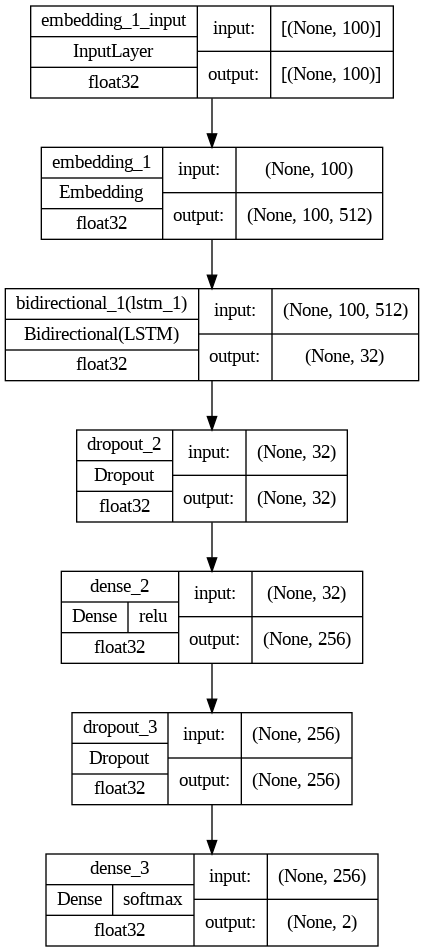

In [ ]:
keras.utils.plot_model(
    model,
    show_shapes=True,
    show_dtype=True,
    show_layer_activations=True
)

In [ ]:
history = model.fit(X_train, y_train,
                    validation_data=(X_val, y_val),
                    epochs=5,
                    verbose=1,
                    batch_size=128)

Epoch 1/5
258/258 [==============================] - 352s 1s/step - loss: 1.0301 - accuracy: 0.5724 - val_loss: 0.6464 - val_accuracy: 0.6380
Epoch 2/5
258/258 [==============================] - 361s 1s/step - loss: 0.6063 - accuracy: 0.6879 - val_loss: 0.6178 - val_accuracy: 0.6466
Epoch 3/5
258/258 [==============================] - 348s 1s/step - loss: 0.5378 - accuracy: 0.7442 - val_loss: 0.6279 - val_accuracy: 0.6449
Epoch 4/5
 34/258 [==>...........................] - ETA: 4:58 - loss: 0.4814 - accuracy: 0.8022

KeyboardInterrupt: 

## Prediction

In [ ]:
pred = model.predict(X_val)

In [ ]:
predictions = [1 if i[0] > 0.6 else 0 for i in pred]

In [ ]:
actual = [1 if i[0] > 0.6 else 0 for i in y_val]

In [ ]:
c = 0
n = len(predictions)
for i in range(n):
    if predictions[i] == actual[i]:
        c += 1
print(f"Total: {n}, Correct: {c}, Percentage correct: {c * 100 /n}%")

Total: 8229, Correct: 5251, Percentage correct: 63.810912626078505%


In [ ]:
sequences = tokenizer.texts_to_sequences(["fuck niggas"])
max_sequence_length = 100
padded_sequence = pad_sequences(sequences, maxlen=max_sequence_length)
predictions = model.predict(padded_sequence)
if predictions[0][1] > 0.75:
    ans = "Hate"
else:
    ans = "Not Hate"
print(f"Score: {predictions}, Prediction: {ans}")

1/1 [==============================] - 0s 32ms/step
Score: [[0.9076029  0.09239707]], Prediction: Not Hate
